In [2]:
import pandas as pd
df=pd.read_csv("/content/Elon_musk.csv",encoding="latin-1")

In [3]:
df

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [9]:
df.drop(['Unnamed: 0'],inplace=True,axis=1)

In [4]:
import numpy as np
import pandas as pd
import string
import spacy

import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
from wordcloud import WordCloud
  %matplotlib inline

In [10]:
df.shape

(1999, 1)

In [6]:
!python -m spacy download en

⚠ As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the
full pipeline package name 'en_core_web_sm' instead.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 50.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [11]:
df=[Text.strip() for Text in df.Text]
df=[Text for Text in df if Text]
df[0:10]

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely']

In [12]:
text=' '.join(df)
text

'@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it? @joerogan @Spotify Great interview! @gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! Happy New Year of the Ox! https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation. The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U

In [14]:
no_punc_text=text.translate(str.maketrans('','',string.punctuation))
no_punc_text

'kunalb11 I\x92m an alien IDAACarmack Ray tracing on Cyberpunk with HDR is nextlevel Have you tried it joerogan Spotify Great interview gtera27 Doge is underestimated teslacn Congratulations Tesla China for amazing execution last year Now on to the next for even more Happy New Year of the Ox httpstco9WFKMYu2oj Frodo was the underdoge\nAll thought he would fail\nHimself most of all httpstcozGxJFDzzrM OwenSparks flcnhvy anonyx10 Haha thanks  flcnhvy anonyx10 Indeed Tweets definitely do not represent realworld time allocation The most entertaining outcome is the most likely GiveDirectly Just sent some Just agree to do Clubhouse with kanyewest httpstco3rWE9uHSTS geoffkeighley UnrealEngine It\x92s getting real Bought some Dogecoin for lil X so he can be a toddler hodler JoshManMode He definitely has issues but the sentencing seems a bit high freewalletorg Thanks for fixing freewalletorg Please unlock my account AstroJordy U0001F923U0001F923 This is true power haha httpstcoFc9uhQSd7O freewal

In [15]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

# **Tokenizatiom**

In [16]:
from nltk.tokenize import word_tokenize
text_tokens=word_tokenize(no_punc_text)
print(text_tokens[0:10])

['kunalb11', 'I\x92m', 'an', 'alien', 'IDAACarmack', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with']


# **Remove Stopwords**

In [18]:
from nltk.corpus import stopwords
nltk.download('stopwords')

my_stop_words=stopwords.words('english')
no_stop_tokens=[word for word in text_tokens if not word in my_stop_words]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [19]:
print(no_stop_tokens[0:40])

['kunalb11', 'I\x92m', 'alien', 'IDAACarmack', 'Ray', 'tracing', 'Cyberpunk', 'HDR', 'nextlevel', 'Have', 'tried', 'joerogan', 'Spotify', 'Great', 'interview', 'gtera27', 'Doge', 'underestimated', 'teslacn', 'Congratulations', 'Tesla', 'China', 'amazing', 'execution', 'last', 'year', 'Now', 'next', 'even', 'Happy', 'New', 'Year', 'Ox', 'httpstco9WFKMYu2oj', 'Frodo', 'underdoge', 'All', 'thought', 'would', 'fail']


# **Normalize the Data**

In [20]:
lower_words=[Text.lower() for Text in no_stop_tokens]
print(lower_words[0:25])

['kunalb11', 'i\x92m', 'alien', 'idaacarmack', 'ray', 'tracing', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'tried', 'joerogan', 'spotify', 'great', 'interview', 'gtera27', 'doge', 'underestimated', 'teslacn', 'congratulations', 'tesla', 'china', 'amazing', 'execution', 'last']


# **Stemming**

In [21]:
from nltk.stem import PorterStemmer
ps=PorterStemmer()
stemmed_tokens=[ps.stem(word) for word in lower_words]
print(stemmed_tokens[0:10])

['kunalb11', 'i\x92m', 'alien', 'idaacarmack', 'ray', 'trace', 'cyberpunk', 'hdr', 'nextlevel', 'have']


# **NLP English Language model of Spacy Library**

In [22]:
nlp=spacy.load('en_core_web_sm')

In [23]:
doc=nlp(' '.join(no_stop_tokens))
print(doc[0:40])

kunalb11 Im alien IDAACarmack Ray tracing Cyberpunk HDR nextlevel Have tried joerogan Spotify Great interview gtera27 Doge underestimated teslacn Congratulations Tesla China amazing execution last year Now next even Happy New Year Ox httpstco9WFKMYu2oj Frodo underdoge All thought would fail


In [24]:
lemmas=[token.lemma_ for token in doc]
print(lemmas[0:25])

['kunalb11', 'I\x92m', 'alien', 'IDAACarmack', 'Ray', 'trace', 'Cyberpunk', 'HDR', 'nextlevel', 'have', 'try', 'joerogan', 'spotify', 'great', 'interview', 'gtera27', 'Doge', 'underestimate', 'teslacn', 'Congratulations', 'Tesla', 'China', 'amazing', 'execution', 'last']


# **Feature Extraction**

In [26]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer()
X=vectorizer.fit_transform(lemmas)

In [28]:
vectorizer.vocabulary_

{'kunalb11': 2702,
 'alien': 231,
 'idaacarmack': 2439,
 'ray': 3621,
 'trace': 4498,
 'cyberpunk': 962,
 'hdr': 1676,
 'nextlevel': 3157,
 'have': 1670,
 'try': 4532,
 'joerogan': 2622,
 'spotify': 4116,
 'great': 1608,
 'interview': 2550,
 'gtera27': 1627,
 'doge': 1115,
 'underestimate': 4665,
 'teslacn': 4343,
 'congratulations': 856,
 'tesla': 4337,
 'china': 740,
 'amazing': 257,
 'execution': 1326,
 'last': 2721,
 'year': 4938,
 'now': 3197,
 'next': 3156,
 'even': 1298,
 'happy': 1657,
 'new': 3153,
 'ox': 3314,
 'httpstco9wfkmyu2oj': 1866,
 'frodo': 1494,
 'underdoge': 4664,
 'all': 234,
 'thought': 4422,
 'would': 4913,
 'fail': 1362,
 'himself': 1722,
 'httpstcozgxjfdzzrm': 2399,
 'owensparks': 3311,
 'flcnhvy': 1436,
 'anonyx10': 286,
 'haha': 1642,
 'thanks': 4381,
 'indeed': 2488,
 'tweets': 4555,
 'definitely': 1017,
 'represent': 3704,
 'realworld': 3646,
 'time': 4441,
 'allocation': 236,
 'the': 4388,
 'entertaining': 1254,
 'outcome': 3291,
 'likely': 2783,
 'givedir

In [29]:
pd.DataFrame(vectorizer.vocabulary_,columns=vectorizer.vocabulary_.keys(),index=[0]).T

,0
kunalb11,2702
alien,231
idaacarmack,2439
ray,3621
trace,4498
...,...
httpstcowjrzibkh1h,2331
click,774
samwise,3821
gamgee,1530


In [31]:
pd.DataFrame.from_records([vectorizer.vocabulary_]).T.sort_values(0,ascending=False).head()

,0
ðogecoin,4970
zzcool,4969
zwiebelbach,4968
zubinanary,4967
zshauladventure,4966


In [32]:
print(vectorizer.vocabulary_)

{'kunalb11': 2702, 'alien': 231, 'idaacarmack': 2439, 'ray': 3621, 'trace': 4498, 'cyberpunk': 962, 'hdr': 1676, 'nextlevel': 3157, 'have': 1670, 'try': 4532, 'joerogan': 2622, 'spotify': 4116, 'great': 1608, 'interview': 2550, 'gtera27': 1627, 'doge': 1115, 'underestimate': 4665, 'teslacn': 4343, 'congratulations': 856, 'tesla': 4337, 'china': 740, 'amazing': 257, 'execution': 1326, 'last': 2721, 'year': 4938, 'now': 3197, 'next': 3156, 'even': 1298, 'happy': 1657, 'new': 3153, 'ox': 3314, 'httpstco9wfkmyu2oj': 1866, 'frodo': 1494, 'underdoge': 4664, 'all': 234, 'thought': 4422, 'would': 4913, 'fail': 1362, 'himself': 1722, 'httpstcozgxjfdzzrm': 2399, 'owensparks': 3311, 'flcnhvy': 1436, 'anonyx10': 286, 'haha': 1642, 'thanks': 4381, 'indeed': 2488, 'tweets': 4555, 'definitely': 1017, 'represent': 3704, 'realworld': 3646, 'time': 4441, 'allocation': 236, 'the': 4388, 'entertaining': 1254, 'outcome': 3291, 'likely': 2783, 'givedirectly': 1579, 'just': 2649, 'send': 3889, 'agree': 200, 

In [34]:
print(vectorizer.get_feature_names_out()[50:100])
print(X.toarray()[50:100])

['23' '230' '24' '240am' '247teslanew' '25' '250' '250kw' '25d'
 '25gunsteslacom' '25k' '25th' '28' '28delayslater' '28th' '29' '2k' '2nd'
 '2v' '30' '300' '301' '304' '304l' '31' '33' '330' '360' '37' '3800'
 '394' '39a' '3d' '3rd' '40' '400' '42' '420' '4227' '430' '43rd' '445pm'
 '448' '4530000' '45thspacewe' '4680' '479000' '48' '4d' '4th']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [35]:
print(X.toarray().shape)

(15795, 4971)


# **Bigrams and Trigrams**

In [36]:
vectorizer_ngram_range=CountVectorizer(analyzer='word',ngram_range=(3,3),max_features=100)
bow_matrix_ngram=vectorizer_ngram_range.fit_transform(df)

In [37]:
bow_matrix_ngram

<1999x100 sparse matrix of type '<class 'numpy.int64'>'
	with 485 stored elements in Compressed Sparse Row format>

In [38]:
print(vectorizer_ngram_range.get_feature_names_out())
print(bow_matrix_ngram.toarray())

['2192 https co' '60 starlink satellites'
 'ajtourville comma_ai tesmanian_com'
 'alex_avoigt mike_zimon wholemarsblog' 'also https co' 'are going to'
 'as soon as' 'astrobehnken and astro_doug' 'at https co' 'be able to'
 'brendan2908 bocachicagal nasaspaceflight'
 'caspar_stanley ercxspace marcushousegame' 'cfs_energy cup_plasma mit'
 'confirmed https co' 'course still love' 'crew dragon first'
 'dragon first operational' 'droneship https co' 'entertaining outcome is'
 'ercxspace marcushousegame felixschlang'
 'erdayastronaut josh_bickett ajtourville'
 'erdayastronaut queue_max nasaspaceflight' 'falcon first stage'
 'first operational mission' 'first stage has' 'flight https co'
 'from the space_station' 'futurejurvetson cfs_energy cup_plasma'
 'haha https co' 'has landed on' 'home to earth'
 'icannot_enough flcnhvy tesla' 'in https co' 'is 0001f525 0001f525'
 'is https co' 'it https co' 'it should be' 'it will be'
 'jgrano305 teslaratiteam teslarati' 'josh_bickett ajtourville spacex

# **Tf-Idf Vectorizer**

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer
vc=TfidfVectorizer(norm="l2",analyzer='word',ngram_range=(2,3),max_features=100)
tf_idf_matrix_n_gram_max_features=vc.fit_transform(df)
print(tf_idf_matrix_n_gram_max_features.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


# **Generate wordcloud**

In [43]:
from wordcloud import WordCloud,STOPWORDS

def plot_cloud(wordcloud):
  plt.figure(figsize=(40,30))
  plt.imshow(wordcloud)
  plt.axis("off");

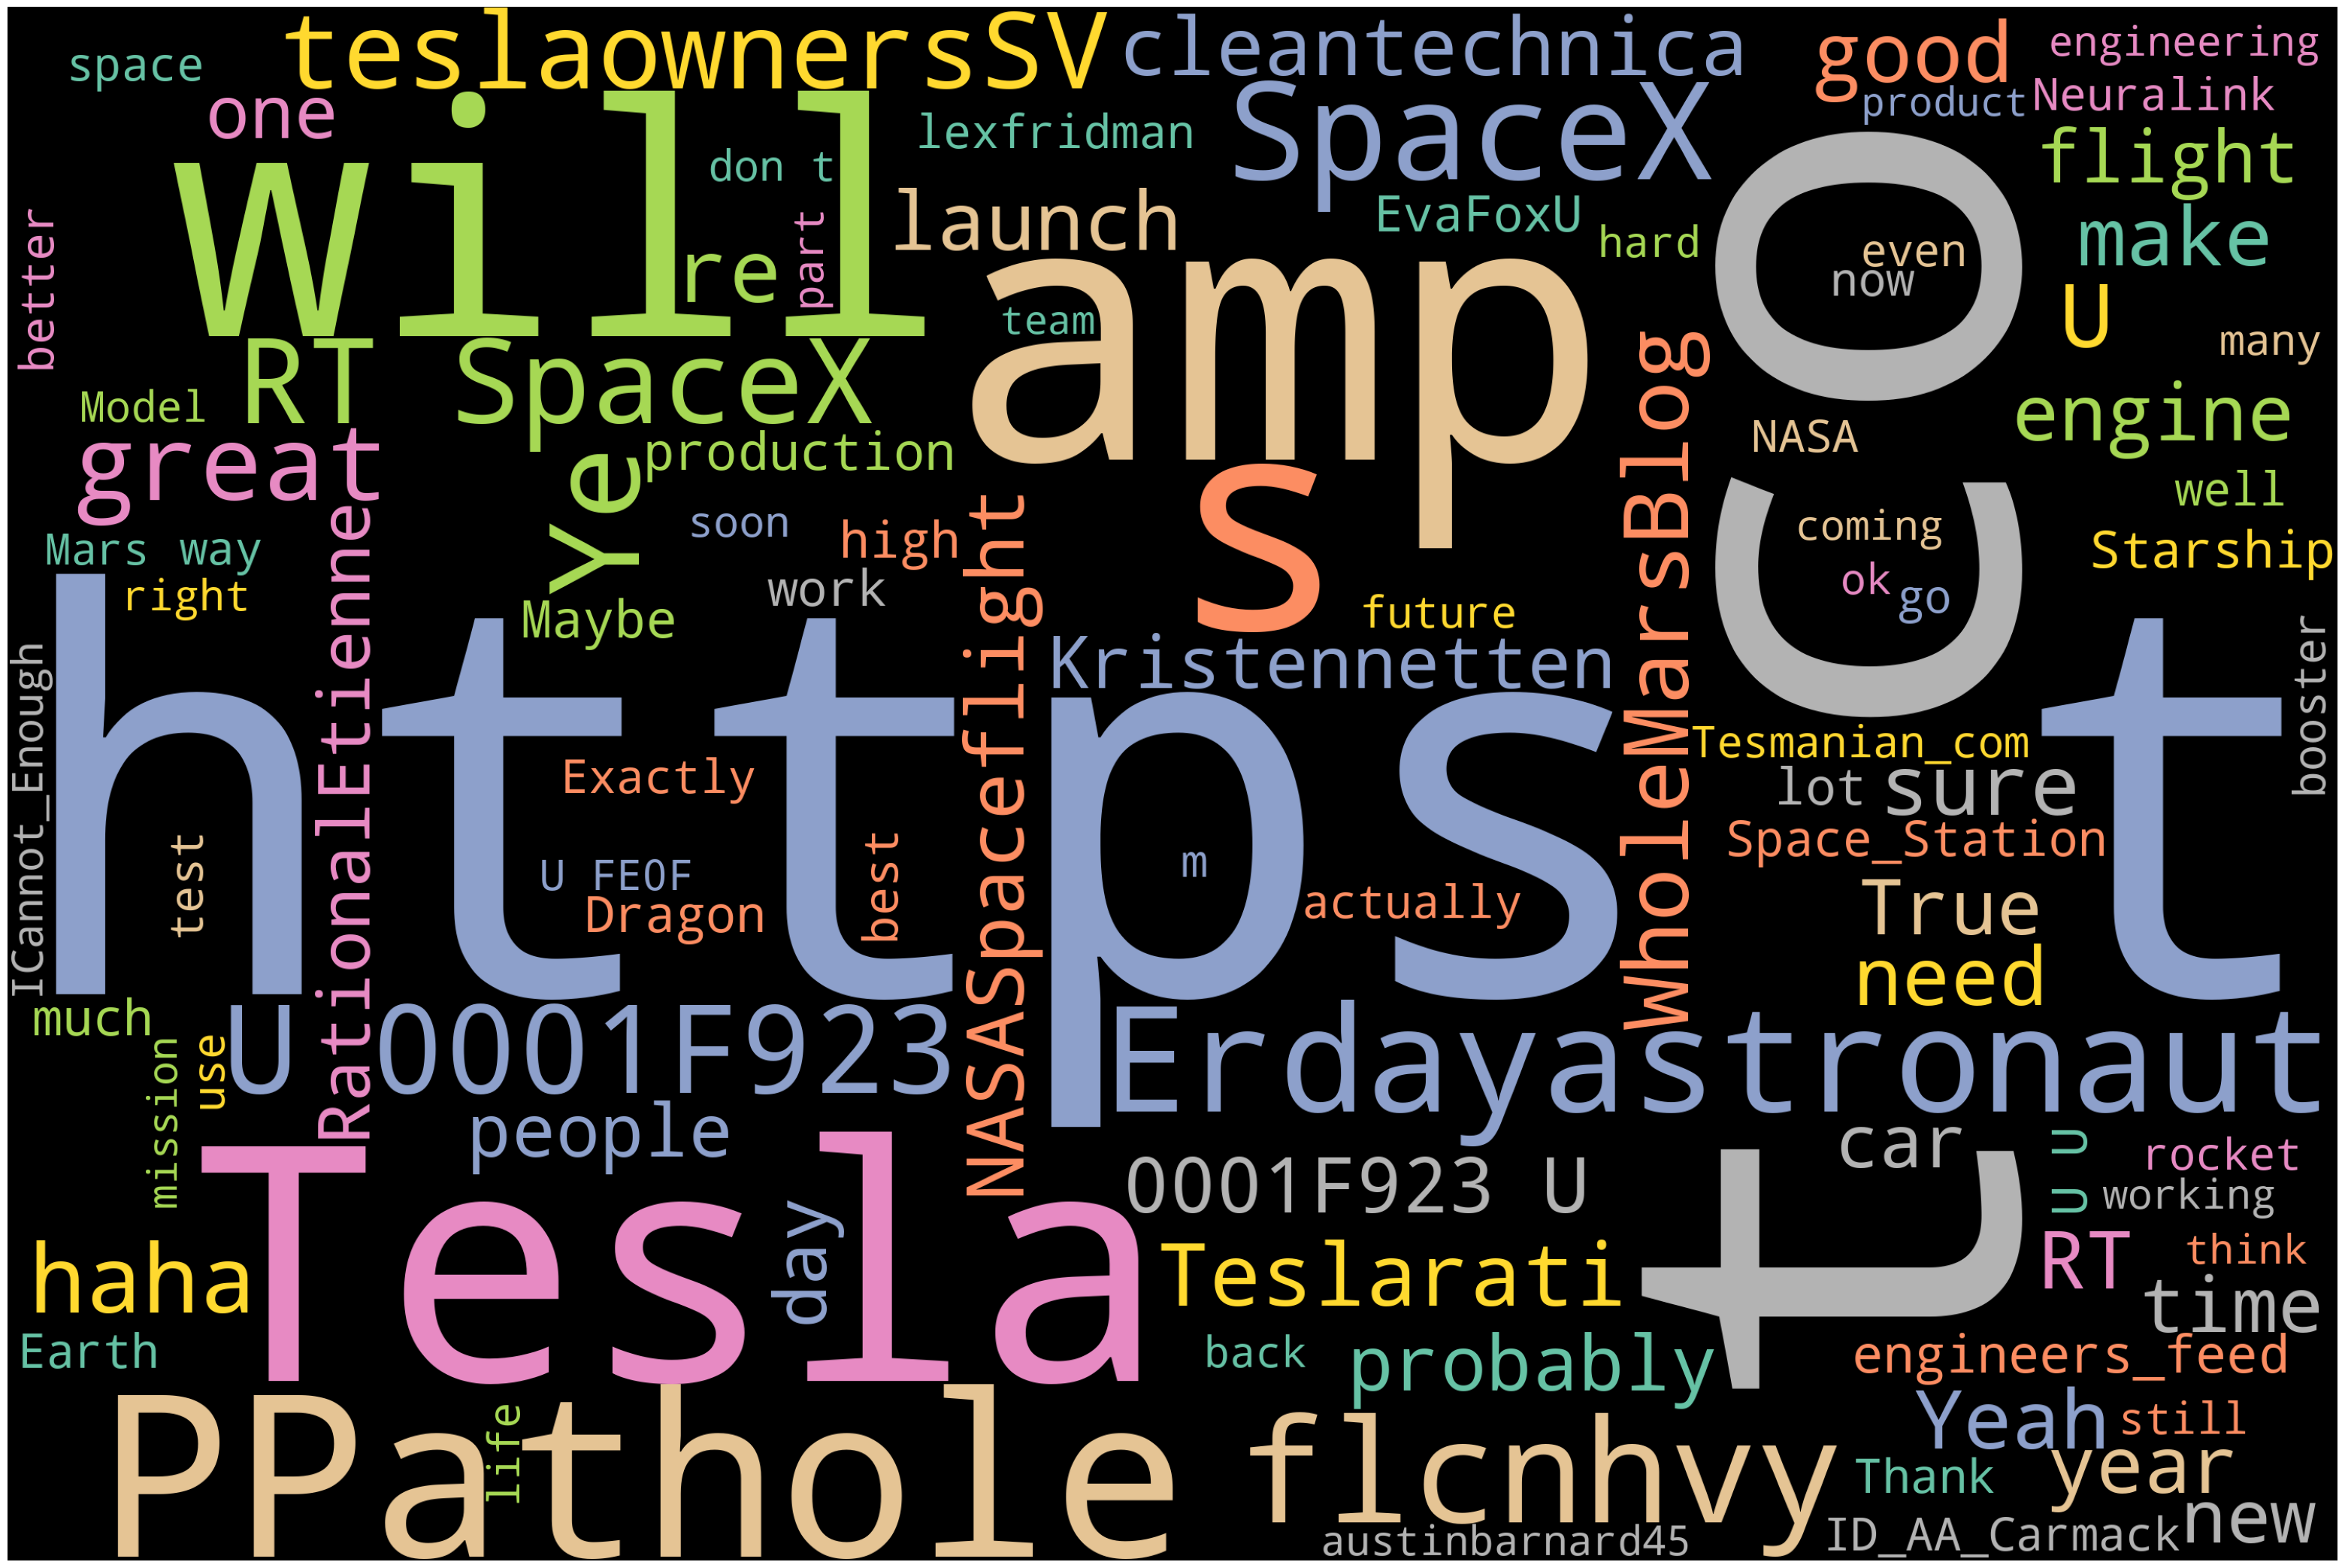

In [44]:
stopwords=STOPWORDS
wordcloud=WordCloud(width=3000,height=2000,background_color='black',max_words=100,colormap='Set2',stopwords=stopwords).generate(text)
plot_cloud(wordcloud)

In [45]:
wordcloud.to_file("wordcloud.png")

# **Sentiment Analysis**

In [48]:
from nltk import tokenize
sentences=tokenize.sent_tokenize(" ".join(df))
sentences[10:15]

['https://t.co/3pWt @ajtourville Yes @BLKMDL3 @RationalEtienne @Adamklotz_ Once we can predict cash flow reasonably well, Starlink will IPO @RationalEtienne @Adamklotz_ Starlink is a staggeringly difficult technical &amp; economic endeavor.',
 'However, if we don\x85 https://t.co/9Z8Ac6skqx @RationalEtienne @Adamklotz_ SpaceX needs to pass through a deep chasm of negative cash flow over the next year or\x85 https://t.co/7J1c92hdjl @ID_AA_Carmack Lowest cost per ton of carbon sequestered, net of value of any product made.',
 'Must be scalable to g\x85 https://t.co/XMyI7qWSgw @Adamklotz_ It\x92s meant to be the same price in all countries.',
 'Only difference should be taxes &amp; shipping.',
 '@tobyliiiiiiiiii This is intended for Earth, but there may be some ideas that apply to Mars too @CryptoShrikar @CoinDesk @Tesla @Dan_Z_Palmer <U+0001F923><U+0001F923> XPrize team will manage the $100M carbon capture prize https://t.co/fSw5IanL0r @SRuhle Everyone at Tesla receives stock.']

In [49]:
sent_df=pd.DataFrame(sentences,columns=['sentence'])
sent_df

,sentence
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...
1,Have you tried it?
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated @teslacn Congr...
4,Now on to the next for even more!!
...,...
922,"@kenyanwalstreet Not actually a payout, just a..."
923,"It may never pay out, as the stock cant b ht..."
924,Details Aug 28.
925,AI symbiosis while u wait @vistacruiser7 @flcn...


In [51]:
afinn=pd.read_csv("/content/Afinn.csv",encoding="latin-1")

In [52]:
affinity_scores=afinn.set_index('word')['value'].to_dict()

In [53]:
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

# **score each word in a sentence in lemmatised**

In [56]:
nlp=spacy.load('en_core_web_sm')
sentiment_lexicon=affinity_scores

def calculate_sentiment(text: str=None):
  sent_score=0
  if text:
    sentence=nlp(text)
    print(sentence)
    for word in sentence:
      sent_score += sentiment_lexicon.get(word.lemma_, 0)
  return sent_score

In [57]:
sent_df['sentiment_value']=sent_df['sentence'].apply(calculate_sentiment)

@kunalb11 Im an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level.
Have you tried it?
@joerogan @Spotify Great interview!
@gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year.
Now on to the next for even more!!
Happy New Year of the Ox!
https://t.co/9WFKMYu2oj Frodo was the underdoge,
All thought he would fail,
Himself most of all.
https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed!
Tweets definitely do not represent real-world time allocation.
The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine Its getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U+0001F923

In [58]:
sent_df

,sentence,sentiment_value
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...,0
1,Have you tried it?,0
2,@joerogan @Spotify Great interview!,3
3,@gtera27 Doge is underestimated @teslacn Congr...,3
4,Now on to the next for even more!!,0
...,...,...
922,"@kenyanwalstreet Not actually a payout, just a...",0
923,"It may never pay out, as the stock cant b ht...",-4
924,Details Aug 28.,0
925,AI symbiosis while u wait @vistacruiser7 @flcn...,-2


In [59]:
sent_df.sort_values(by='sentiment_value').tail(10)

,sentence,sentiment_value
226,"@PPathole @karpathy For a second there, I thou...",11
161,@harsimranbansal @heydave7 It will most likely...,11
820,Might be able to https://t.co/FB7e5nOq2E @Pri...,11
186,"Also, w https://t.co/IYdKttVsqk @cleantechnic...",12
81,@teslaownersSV This is a good one @MrBeastYT I...,13
648,Its https://t.co/IxhyT6NuiC @Teslarati Tesla...,13
588,The open areas https://t.co/rabjKrtQlw @Sav...,14
105,@Erdayastronaut @SpaceX Was also thinking that...,16
36,"@ajtourville @Erdayastronaut @SpaceX Yes, but ...",16
722,We just havent observed the https://t.co/mez...,17


In [60]:
sent_df['sentiment_value'].describe()

count    927.000000
mean       1.348436
std        2.688761
min       -8.000000
25%        0.000000
50%        0.000000
75%        3.000000
max       17.000000
Name: sentiment_value, dtype: float64

In [62]:
sent_df[sent_df['sentiment_value']<=0].head()

,sentence,sentiment_value
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...,0
1,Have you tried it?,0
4,Now on to the next for even more!!,0
5,Happy New Year of the Ox!,0
6,https://t.co/9WFKMYu2oj Frodo was the underdog...,-2


In [63]:
sent_df[sent_df['sentiment_value']>=10].head()

,sentence,sentiment_value
36,"@ajtourville @Erdayastronaut @SpaceX Yes, but ...",16
81,@teslaownersSV This is a good one @MrBeastYT I...,13
105,@Erdayastronaut @SpaceX Was also thinking that...,16
153,"@GUNMTLM3 @lexfridman No, but definitely this ...",10
161,@harsimranbansal @heydave7 It will most likely...,11


In [64]:
sent_df[sent_df['sentiment_value']>=10].head()['sentence'].tolist()[0]

'@ajtourville @Erdayastronaut @SpaceX Yes, but engines have a min throttle point where there is flameout risk, so la\x85 https://t.co/ThniYsSnWn @Adamklotz_ @Erdayastronaut @SpaceX Yes @Erdayastronaut @SpaceX It was foolish of us not to start 3 engines &amp; immediately shut down 1, as 2 are needed to land I am become meme,\nDestroyer of shorts @commander_cruz Might actually happen Sandstorm is a masterpiece @MadOverlord We were too dumb Next time, we try pull *up* method https://t.co/J1M7WHLRDR Low-key Loki No highs, no lows, only Doge No need to be a gigachad to own Dogecoin is the people\x92s crypto ur welcome https://t.co/e2KF57KLxb @HuobiGlobal The most entertaining outcome is the most likely Doge https://t.co/vviUzWhodT @Erdayastronaut High seas &amp; wind This was a tough one https://t.co/beY7peFpCj RT @SpaceX: Watch Falcon 9 launch 60 Starlink satellites <U+2192> https://t.co/bJFjLCzWdK  https://t.co/Ln95rEesbW Off Twitter for a while It will be filled with graffiti art @eiraum

In [65]:
sent_df['index']=range(0,len(sent_df))

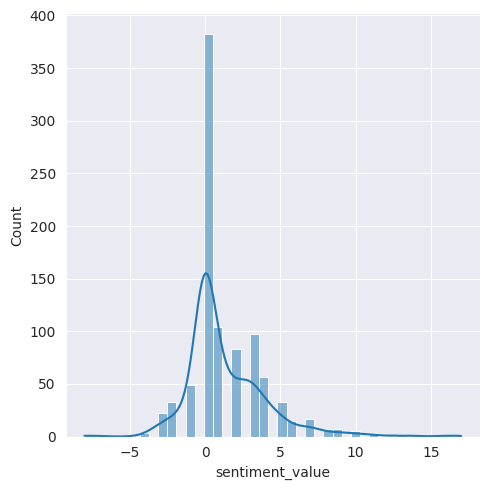

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style(style='darkgrid')
sns.displot(data=sent_df, x='sentiment_value', kde=True)
plt.show()

<Axes: xlabel='index', ylabel='sentiment_value'>

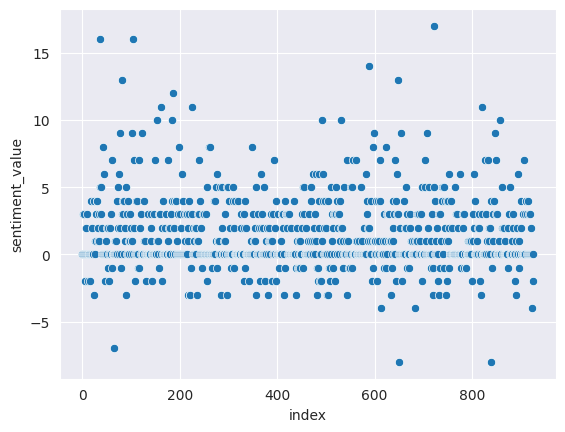

In [72]:
sns.scatterplot(y='sentiment_value',x='index',data=sent_df)

<Axes: xlabel='index', ylabel='sentiment_value'>

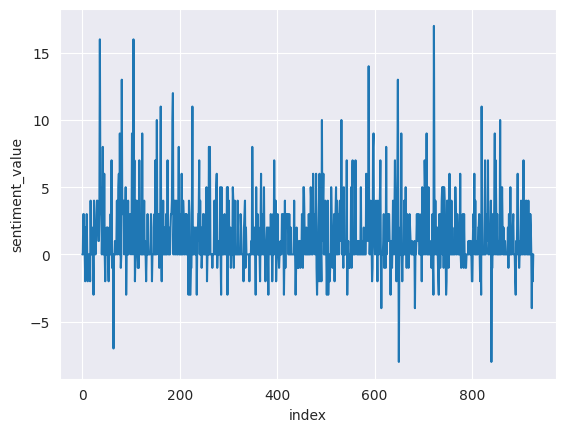

In [73]:
sns.lineplot(y='sentiment_value',x='index',data=sent_df)